In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset from seaborn
df = sns.load_dataset('titanic')

# Display the first few rows of the dataset
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# Check the shape of the dataset
print("Shape of the dataset:", df.shape)

# Get a summary of the dataset
print("\nDataset summary:")
print(df.info())

# Check for missing values in the dataset
print("\nMissing values:")
print(df.isnull().sum())


Shape of the dataset: (891, 15)

Dataset summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

Missing values:
survive

In [5]:
# Fill missing 'age' values with the median age
df['age'].fillna(df['age'].median(), inplace=True)

# Fill missing 'embarked' and 'embark_town' values with the mode (most frequent value)
most_frequent_embarked = df['embarked'].mode()[0]
df['embarked'].fillna(most_frequent_embarked, inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

# Drop the 'deck' column since it has too many missing values
df.drop(columns=['deck'], inplace=True)

# Check if missing values are handled
print("Missing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3824\3690043092.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3824\3690043092.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [7]:
# Fill missing values correctly without chained assignment
df['age'] = df['age'].fillna(df['age'].median())  # Filling missing age values with median
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])  # Filling missing embarked values with mode
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])  # Filling missing embark_town values with mode

# Verify missing values after cleaning
print(df.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3824\177495763.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', data=df, ax=axes[1, 0], palette="Set2")
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3824\177495763.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pclass', data=df, ax=axes[1, 1], palette="Set1")


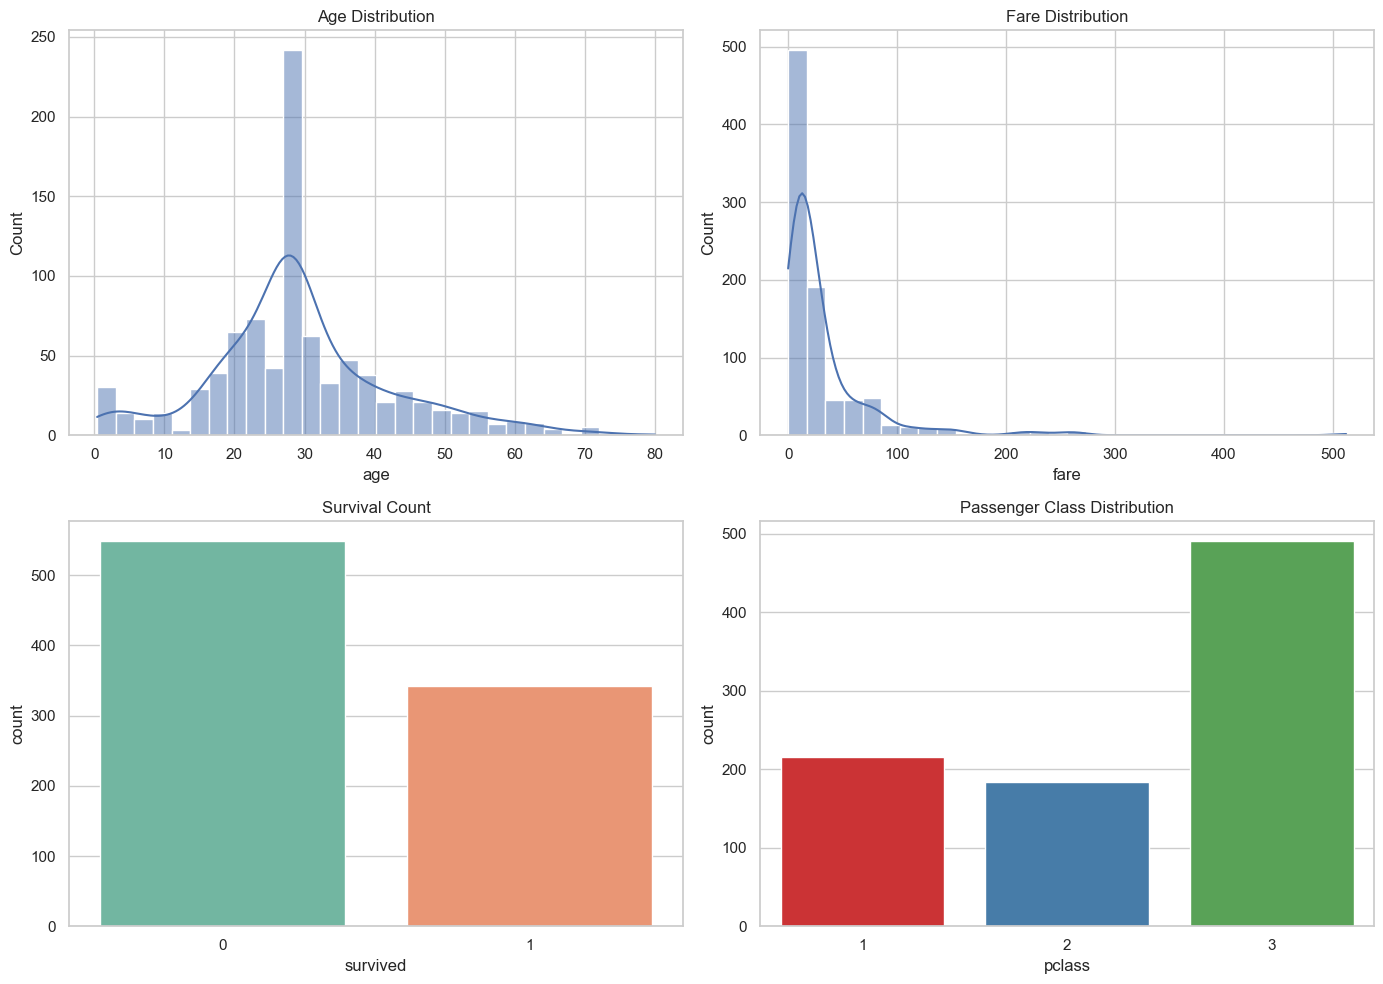

In [11]:
# Set Seaborn style
sns.set_theme(style="whitegrid")

# Create figure and axes
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Histogram of Age
sns.histplot(df['age'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# 2. Histogram of Fare
sns.histplot(df['fare'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Fare Distribution')

# 3. Count plot of Survived
sns.countplot(x='survived', data=df, ax=axes[1, 0], palette="Set2")
axes[1, 0].set_title('Survival Count')

# 4. Count plot of Passenger Class
sns.countplot(x='pclass', data=df, ax=axes[1, 1], palette="Set1")
axes[1, 1].set_title('Passenger Class Distribution')

# Adjust layout
plt.tight_layout()
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3824\1017213744.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="sex", y="survived", data=df, ci=None, palette="coolwarm")
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3824\1017213744.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="sex", y="survived", data=df, ci=None, palette="coolwarm")


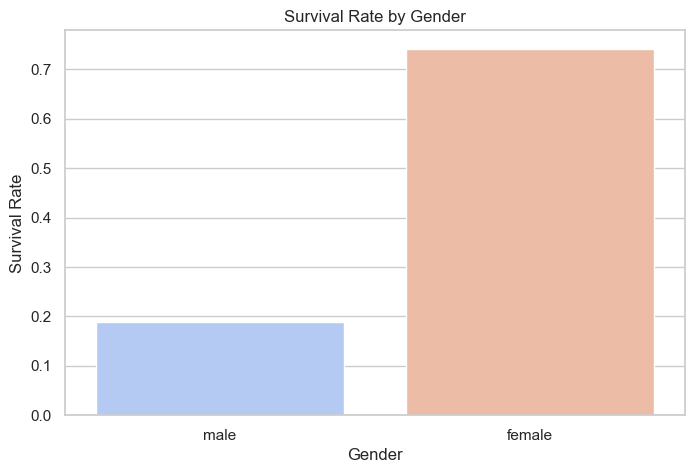

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3824\1017213744.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="pclass", y="survived", data=df, ci=None, palette="coolwarm")
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3824\1017213744.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="pclass", y="survived", data=df, ci=None, palette="coolwarm")


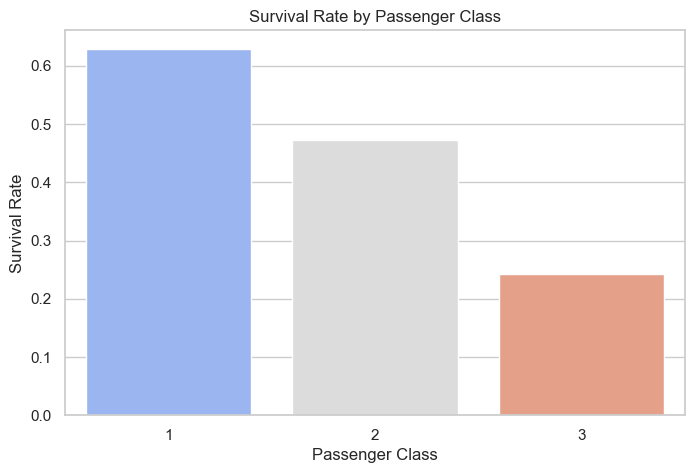

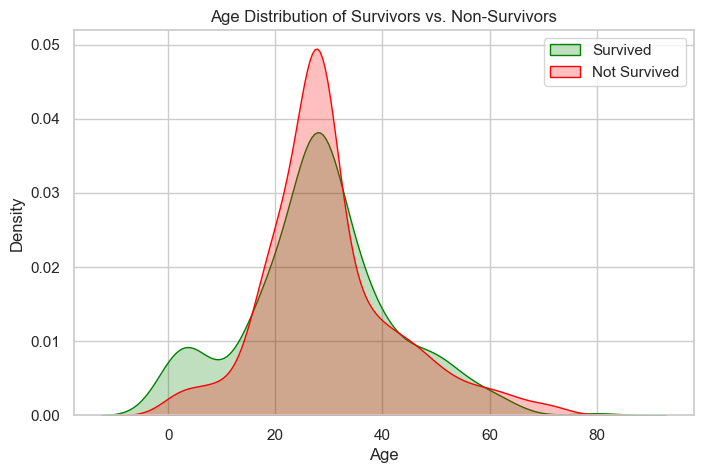

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3824\1017213744.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="family_size", y="survived", data=df, ci=None, palette="coolwarm")
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3824\1017213744.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="family_size", y="survived", data=df, ci=None, palette="coolwarm")


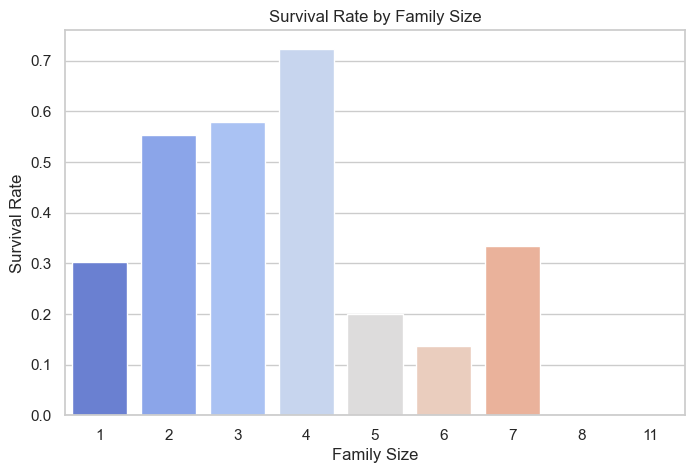

In [21]:
# 1️⃣ Survival by Gender
plt.figure(figsize=(8, 5))
sns.barplot(x="sex", y="survived", data=df, ci=None, palette="coolwarm")
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.xlabel("Gender")
plt.show()

# 2️⃣ Survival by Passenger Class
plt.figure(figsize=(8, 5))
sns.barplot(x="pclass", y="survived", data=df, ci=None, palette="coolwarm")
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.xlabel("Passenger Class")
plt.show()

# 3️⃣ Survival by Age (KDE Plot)
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df[df["survived"] == 1], x="age", label="Survived", fill=True, color="green")
sns.kdeplot(data=df[df["survived"] == 0], x="age", label="Not Survived", fill=True, color="red")
plt.title("Age Distribution of Survivors vs. Non-Survivors")
plt.xlabel("Age")
plt.legend()
plt.show()

# 4️⃣ Survival by Family Size
df["family_size"] = df["sibsp"] + df["parch"] + 1  # Include self

plt.figure(figsize=(8, 5))
sns.barplot(x="family_size", y="survived", data=df, ci=None, palette="coolwarm")
plt.title("Survival Rate by Family Size")
plt.ylabel("Survival Rate")
plt.xlabel("Family Size")
plt.show()

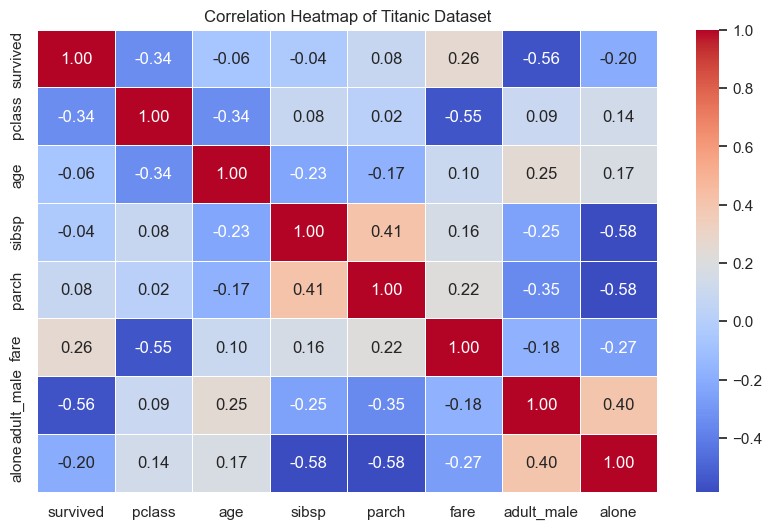

In [23]:
# Selecting numerical columns for correlation analysis
num_cols = ["survived", "pclass", "age", "sibsp", "parch", "fare", "adult_male", "alone"]

# Compute correlation matrix
corr_matrix = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Titanic Dataset")
plt.show()